In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Housing.xlsx')
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [3]:
x = data['House Size (sq.ft.)']
y = data['House Price']

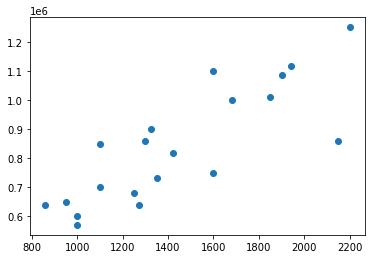

In [4]:
plt.scatter(x,y)
plt.show()

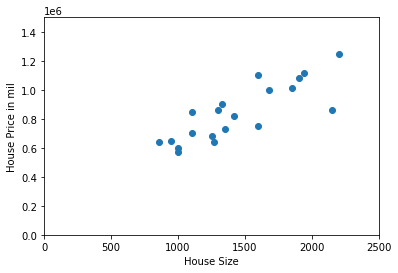

In [5]:
plt.scatter(x,y)
plt.axis([0,2500,0,1500000])
plt.ylabel('House Price in mil')
plt.xlabel('House Size')
plt.show()

In [6]:
X1 = sm.add_constant(x)
reg = sm.OLS(y,X1).fit()

In [7]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           8.13e-06
Time:                        06:27:19   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [9]:
slope

401.91628631922595

In [10]:
intercept

260806.2360560964

In [11]:
r_value ** 2

0.678279986579124

In [12]:
p_value

8.129642377231308e-06

In [13]:
std_err

65.24299510636492

## Multivariate Regression:

In [23]:
x2 = data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction', 'State']]
'''
variable “state” is categorical and we did not convert it to a dummy variable before fitting the regression model.
#convert "state" to dummy variable
df = pd.get_dummies(data, columns=['State'], drop_first=True)
'''
x2 = data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']]
y2 = data['House Price']

In [24]:
X2 = sm.add_constant(x2)
reg2 = sm.OLS(y2,X2).fit()

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           6.82e-05
Time:                        06:33:34   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
df = pd.get_dummies(data, columns=['State'], drop_first=True)
df.head(3)

,House Price,House Size (sq.ft.),Number of Rooms,Year of Construction,State_LA,State_NY,State_TX
0,1116000,1940,8,2002,0,0,0
1,860000,1300,5,1992,0,0,0
2,818400,1420,6,1987,0,0,0


In [27]:
df = pd.get_dummies(data, columns=['State'], drop_first=True)
x2 = df[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction', 'State_LA', 'State_NY', 'State_TX]]
y2 = data['House Price']

SyntaxError: EOL while scanning string literal (1542885154.py, line 2)